### NFLX: MACD & Stochastic Oscillator 

In [1]:
# dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# get NFLX data

file = pd.read_csv("NFLX_updated.csv", index_col = 0, parse_dates=True)
df = pd.DataFrame(file)

In [3]:
df = df.drop(["Daily_Change", "Daily_Pct_Change"], axis=1)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Normalized_Change
Date,,,,,,,
2020-05-26,427.77,428.50,413.14,414.77,414.77,7881100,1.00
2020-05-27,410.38,420.02,397.86,419.89,419.89,10446300,1.01
2020-05-28,417.24,422.37,411.50,413.44,413.44,5655100,1.00
2020-05-29,417.46,420.30,411.85,419.73,419.73,5254900,1.01
2020-06-01,418.83,426.72,415.98,425.92,425.92,3743700,1.03


In [6]:
# Calculating MACD
# need EMA (12 period) & EMA (26 period)

exp1 = df["Close"].ewm(span=12, adjust = False).mean()

exp2 = df["Close"].ewm(span=26, adjust = False).mean()

In [7]:
# Create MACD & Signal Line Columns
df["MACD"] = exp1-exp2

df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Normalized_Change,MACD,Signal_Line
Date,,,,,,,,,
2021-05-17,485.59,492.71,482.81,488.94,488.94,2705200,1.18,-10.532008,-9.383815
2021-05-18,488.40,493.48,486.19,486.28,486.28,2350500,1.17,-10.579588,-9.622969
2021-05-19,481.63,488.57,478.54,487.70,487.70,3349900,1.18,-10.383024,-9.774980
2021-05-20,489.55,502.70,488.98,501.67,501.67,3721200,1.21,-8.996280,-9.619240
2021-05-21,503.12,505.40,497.26,497.89,497.89,3317300,1.20,-8.108817,-9.317156


### Graph the MACD & Signal Line

#### When the MACD is *ABOVE* the Signal line, it is a buy/hold indicator...
#### When the MACD is *BELOW* the Signal line, it is a sell indictator

#### Both the MACD & the Signal Line are LAGGING INDICTATORS 

<IPython.core.display.Javascript object>


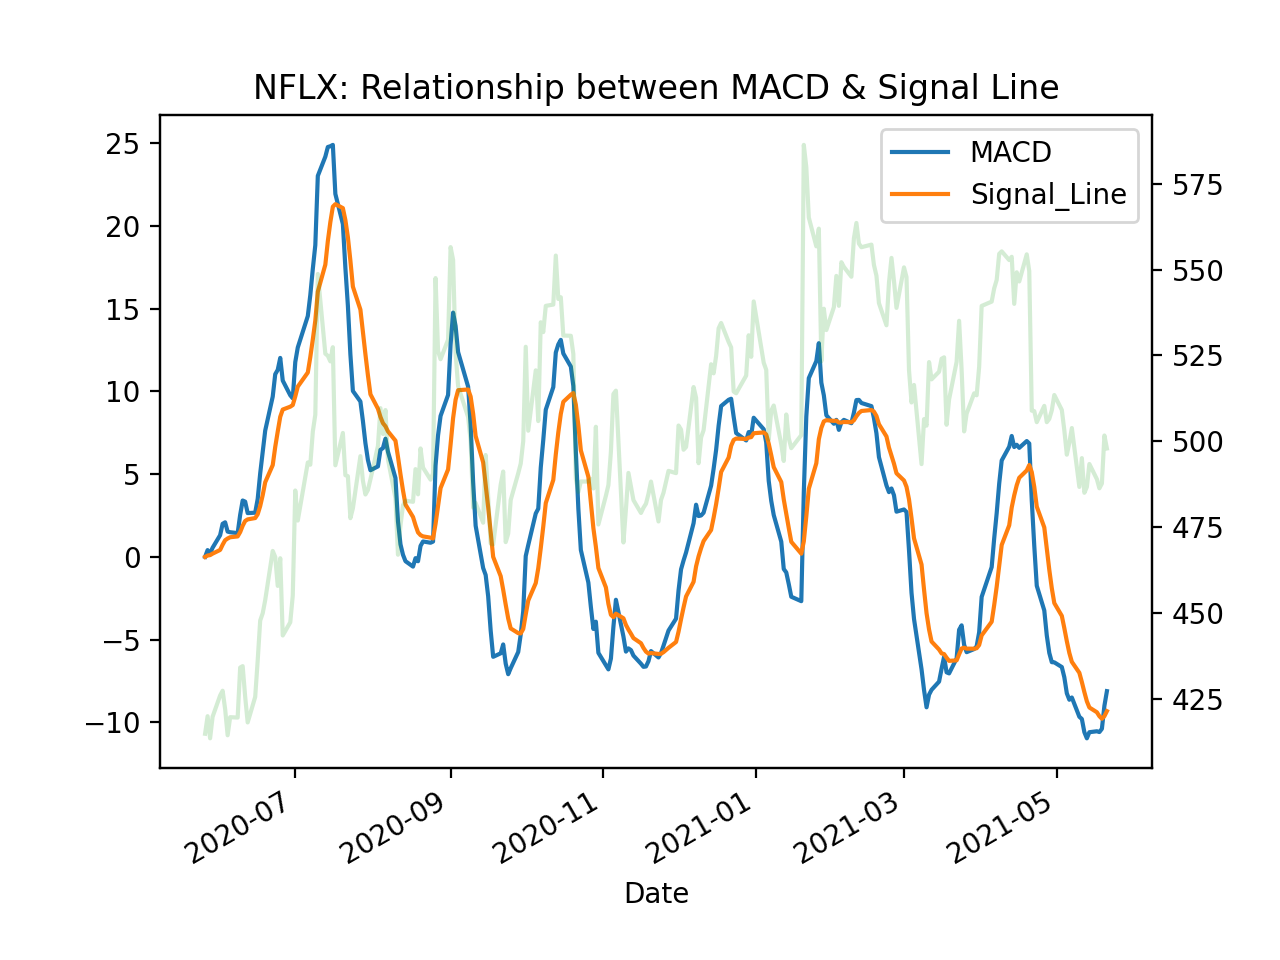

In [11]:
fig, ax = plt.subplots()
df[["MACD", "Signal_Line"]].plot(ax=ax)
df["Close"].plot(ax=ax, alpha = .2, secondary_y= True)
plt.title("NFLX: Relationship between MACD & Signal Line")

# save fig
# plt.savefig("NFLX_MACD.png")


# When the MACD is *ABOVE* the Signal line, it is a buy/hold indicator...
# When the MACD is *BELOW* the Signal line, it is a sell indictator

# BOTH MACD & Signal Line are LAGGING INDICTATORS 

### Stochastic Oscillator

#### Lagging Indictator

##### 14-high: Max of last 14 trading days /// 14-low: Min. of last 14 trading days
##### %K: (Last close -14 day low)*100 / (14 high - 14 low)
##### %D: Simple Moving Average of %K

In [12]:
high14 = df["High"].rolling(14).max()

low14 = df["Low"].rolling(14).min()

df["%K"] = (df["Close"] - low14)*100 / (high14-low14)

df["%D"] = df["%K"].rolling(3).mean()

In [13]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Normalized_Change,MACD,Signal_Line,%K,%D
Date,,,,,,,,,,,
2021-05-17,485.59,492.71,482.81,488.94,488.94,2705200,1.18,-10.532008,-9.383815,25.570437,27.347884
2021-05-18,488.40,493.48,486.19,486.28,486.28,2350500,1.17,-10.579588,-9.622969,18.973214,27.033730
2021-05-19,481.63,488.57,478.54,487.70,487.70,3349900,1.18,-10.383024,-9.774980,22.667657,22.403769
2021-05-20,489.55,502.70,488.98,501.67,501.67,3721200,1.21,-8.996280,-9.619240,57.238307,32.959726
2021-05-21,503.12,505.40,497.26,497.89,497.89,3317300,1.20,-8.108817,-9.317156,58.476881,46.127615


### Graphing the Stoachistic Oscillator

<IPython.core.display.Javascript object>


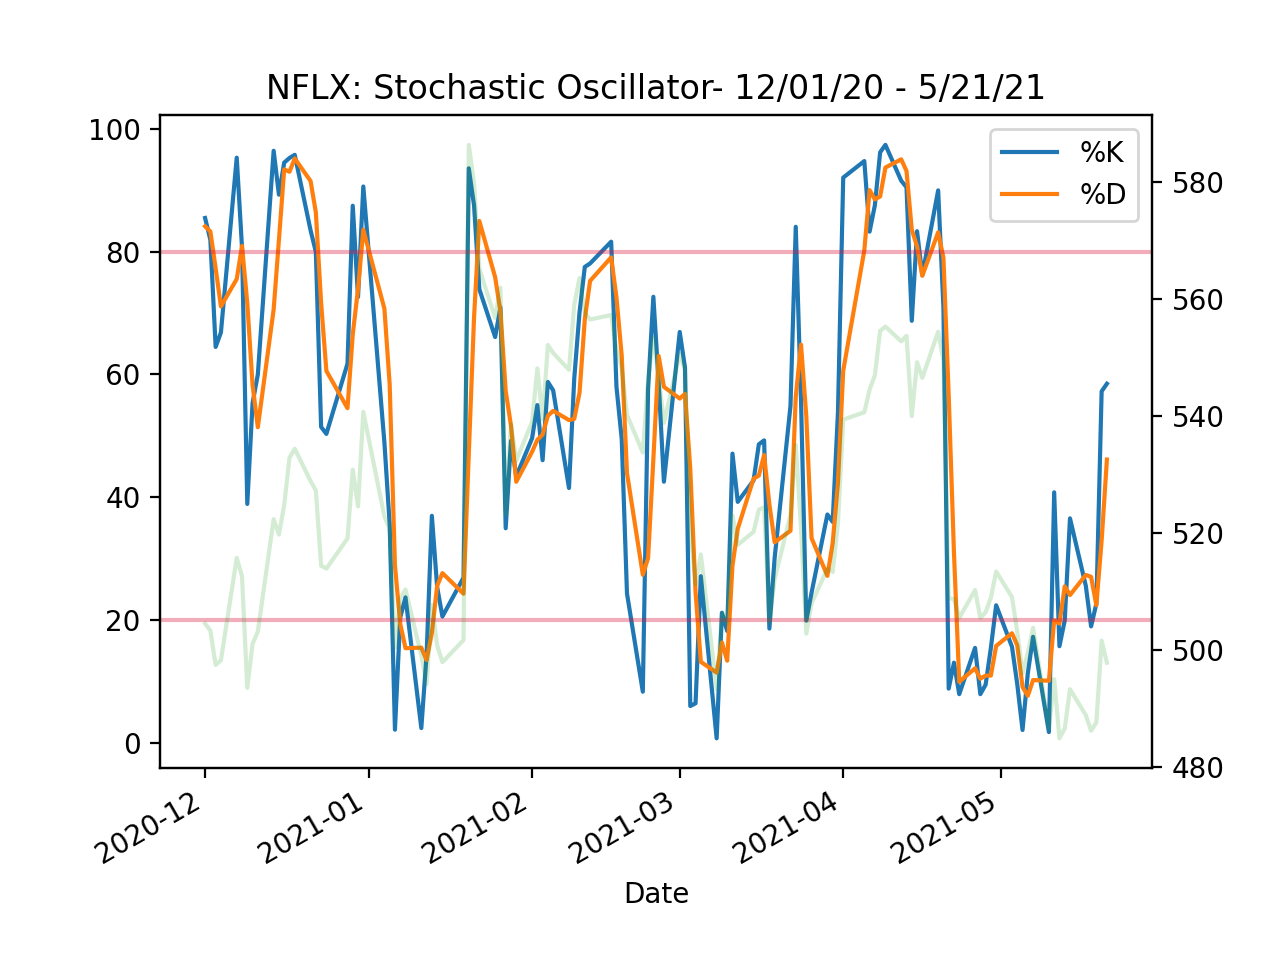

In [15]:
fig, ax = plt.subplots()
df[["%K", "%D"]].loc["2020-12-01":].plot(ax=ax)
ax.axhline(80, c="crimson", alpha=0.35)
ax.axhline(20, c="crimson", alpha=0.35)
df["Close"].loc["2020-12-01":].plot(ax=ax, alpha=.2, secondary_y=True)
plt.title("NFLX: Stochastic Oscillator- 12/01/20 - 5/21/21")

# save figure

# plt.savefig("NFLX_Stochastic.png")

#### Findings - 
###### When the stock is above the 80% line, it is "overbought" and will likely experience a downward correction

###### Looking for when the D line is *LOWER* than the K line and above the 80% line, likely time to *SELL*
###### On the other hand, when the D line is *HIGHER* than the K line and *below* the 20% line, likely undervalued- BUY

In [16]:
# export the updated DF to an csv file

df.to_csv("NFLX_MACD.csv", header=True, index=True)